In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/merged1.csv     
  inflating: dataset/merged10.csv    
  inflating: dataset/merged11.csv    
  inflating: dataset/merged12.csv    
  inflating: dataset/merged13.csv    
  inflating: dataset/merged14.csv    
  inflating: dataset/merged15.csv    
  inflating: dataset/merged16.csv    
  inflating: dataset/merged17.csv    
  inflating: dataset/merged18.csv    
  inflating: dataset/merged19.csv    
  inflating: dataset/merged2.csv     
  inflating: dataset/merged20.csv    
  inflating: dataset/merged21.csv    
  inflating: dataset/merged22.csv    
  inflating: dataset/merged3.csv     
  inflating: dataset/merged4.csv     
  inflating: dataset/merged5.csv     
  inflating: dataset/merged6.csv     
  inflating: dataset/merged7.csv     
  inflating: dataset/merged8.csv     
  inflating: dataset/merged9.csv     


In [ ]:
import pandas as pd
import os

dataset_folder = rf"dataset"

all_data = []

for file in os.listdir(dataset_folder):
    if file.endswith(".csv"):
        dataset_path = os.path.join(dataset_folder, file)

        df = pd.read_csv(dataset_path)

        if "merged_col" in df.columns and "cScore" in df.columns:
            df_sampled = df[["merged_col", "cScore"]].sample(n=min(8000, len(df)))
            all_data.append(df_sampled)
            print(f"✅ Loaded: {file} ({len(df_sampled)} rows)")
        else:
            print(f"⚠️ Skipping {file}: Missing required columns.")

df = pd.concat(all_data, ignore_index=True)

✅ Loaded: merged8.csv (8000 rows)
✅ Loaded: merged14.csv (8000 rows)
✅ Loaded: merged13.csv (8000 rows)
✅ Loaded: merged4.csv (8000 rows)
✅ Loaded: merged5.csv (8000 rows)
✅ Loaded: merged2.csv (4705 rows)
✅ Loaded: merged1.csv (235 rows)
✅ Loaded: merged12.csv (918 rows)
✅ Loaded: merged7.csv (2658 rows)
✅ Loaded: merged3.csv (65 rows)
✅ Loaded: merged21.csv (8000 rows)
✅ Loaded: merged18.csv (8000 rows)
✅ Loaded: merged6.csv (1643 rows)
✅ Loaded: merged19.csv (8000 rows)
✅ Loaded: merged15.csv (8000 rows)
✅ Loaded: merged17.csv (1171 rows)
✅ Loaded: merged22.csv (5075 rows)
✅ Loaded: merged10.csv (8000 rows)
✅ Loaded: merged20.csv (963 rows)
✅ Loaded: merged16.csv (545 rows)
✅ Loaded: merged9.csv (198 rows)
✅ Loaded: merged11.csv (8000 rows)


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   merged_col  5000 non-null   object
 1   cScore      5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
None

Sample data:
                                          merged_col  cScore
0  Commercial office space is available for rent....  medium
1  nan   Commercial Office Space is available for...     low
2  nan   Commercial Office Space is available for...     low
3  With a carpet area of 10800 sq.Ft., this ready...    high
4  solus is an ideal space solution for aspiring ...    high


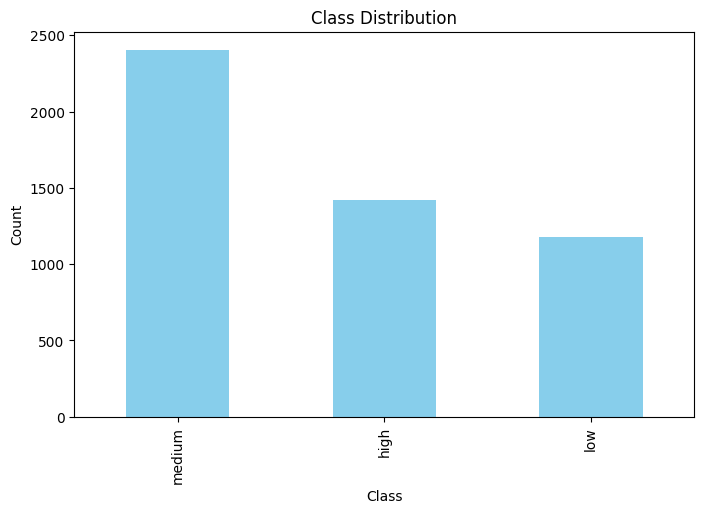

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = df[:5000] # Replace with actual dataset path

# Exploratory Data Analysis (EDA)
print("Dataset overview:")
print(data.info())  # Checking for missing values, data types
print("\nSample data:")
print(data.head())  # Display the first few rows

# Plot class distribution
plt.figure(figsize=(8, 5))
data['cScore'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing to the dataset
train_data['processed_text'] = train_data['merged_col'].apply(preprocess_text)
val_data['processed_text'] = val_data['merged_col'].apply(preprocess_text)
test_data['processed_text'] = test_data['merged_col'].apply(preprocess_text)

# Check the processed text
print(train_data[['merged_col', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                             merged_col  \
3489  commercial Office space is available for Rent ...   
948   nan   Commercial Office Space is available for...   
2132  commercial office space available for rent 500...   
4316  fully furnished office space available for ren...   
4599  Commercial office space is available for rent....   

                                         processed_text  
3489  commercial office space available rent ahemdab...  
948   nan commercial office space available rent kat...  
2132  commercial office space available rent 500 squ...  
4316  fully furnished office space available rent tu...  
4599  commercial office space available rent good lo...  


In [ ]:
!pip install --no-cache-dir --force-reinstall numpy==1.26.4 scipy==1.13.1 gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 228.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 230.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 227.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 289.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 263.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
fasttext_model = gensim.models.FastText(train_data['processed_text'].apply(str.split), vector_size=100, window=5, min_count=5)
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]

print("Embedding completed for BoW, TF-IDF, and FastText.")

Embedding completed for BoW, TF-IDF, and FastText.


In [ ]:
!pip install keras
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 600.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten

def cnn_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cnn_bilstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = 5000
cnn = cnn_model(input_dim)
label_mapping = {"low": 0, "medium": 1, "high": 2}
train_data["cScore"] = train_data["cScore"].map(label_mapping)
val_data["cScore"] = val_data["cScore"].map(label_mapping)
test_data['cScore'] =  test_data["cScore"].map(label_mapping)
cnn.fit(X_train_bow, train_data['cScore'], validation_data=(X_val_bow, val_data['cScore']), epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.4628 - loss: -3283.9055 - val_accuracy: 0.4575 - val_loss: 37569.4492
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.4829 - loss: -949261.0625 - val_accuracy: 0.4575 - val_loss: 1044789.4375
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.4668 - loss: -15449323.0000 - val_accuracy: 0.4575 - val_loss: 5677582.0000
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.4953 - loss: -40017116.0000 - val_accuracy: 0.4575 - val_loss: 16246743.0000
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.4720 - loss: -137900496.0000 - val_accuracy: 0.4575 - val_loss: 42357260.0000


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_cnn = cnn.predict(X_test_bow)
y_pred_lstm = lstm_model(input_dim).predict(X_test_bow)

cnn_acc = accuracy_score(test_data['cScore'], y_pred_cnn.round())
print("CNN Accuracy:", cnn_acc)
print("CNN Classification Report:\n", classification_report(test_data['cScore'], y_pred_cnn.round()))

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step
CNN Accuracy: 0.511
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.51      1.00      0.68       511
           2       0.00      0.00      0.00       278

    accuracy                           0.51      1000
   macro avg       0.17      0.33      0.23      1000
weighted avg       0.26      0.51      0.35      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cnn.save('best_text_classification_model.h5')
print("Best model saved as 'best_text_classification_model.h5'")

Best model saved as 'best_text_classification_model.h5'


In [ ]:
from keras.models import load_model
model = load_model('best_text_classification_model.h5')

new_text = "Agricultural land is available for rent. It has plot area of 5880 sq-ft, it is a good location prope 5880 Sq-ft Agricultural Land is available for Rent in Lakshmanpura, Ahmedabad for 1.0 Lac(s)"
processed_text = preprocess_text(new_text)
input_data = bow_vectorizer.transform([processed_text]).toarray()

predicted_class = model.predict(input_data).round()
print(f"Predicted Class: {predicted_class[0]}")

class_mapping = {0: "low", 1: "medium", 2: "high"}

predicted_class = model.predict(input_data).round().astype(int)[0][0]

predicted_label = class_mapping.get(predicted_class, "Unknown")

print(f"Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Class: [1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: medium
